In [1]:
from data_clean import remove_221_rows, dropping_no_betting_data, josh_features, fill_f_pm_01m, class_or_rating_average, oli_features
from v2_preprocessor import preprocess_features_v2
import pandas as pd

data  = pd.read_csv("../raw_data/raw_data_v2.2.csv")

data_cleaned = remove_221_rows(data)
data_cleaned = dropping_no_betting_data(data_cleaned)
data_cleaned = josh_features(data_cleaned)
data_cleaned = class_or_rating_average(data_cleaned)
data_cleaned = oli_features(data_cleaned)
data_cleaned = fill_f_pm_01m(data_cleaned)



preprocessed_data = preprocess_features_v2(data_cleaned)

preprocessed_data.to_csv("../raw_data/data_cleaned_and_preprocessed.csv", index=False)

data = pd.read_csv("../raw_data/data_cleaned_and_preprocessed.csv")
data.sort_values(by='f_ko')
data = data.query("f_pm_01m < 15")
data = data.reset_index(drop=True)

backtest = data[['f_ko','f_id', 'id','f_horse','f_pm_01m', 'linear_target', 'f_place']]

X = data.drop(columns=['f_pm_01m', 'f_pm_01m_p_back' , 'f_place', 'f_id', 'id', 'f_horse',
                       'trainer_runs_l200r', 'trainer_runs_l50r', 'trainer_runs_l16r',
                       'jockey_runs_l200r', 'jockey_runs_l50r', 'jockey_runs_l16r',
                      'horse_runs_l10r', 'horse_runs_l5r', 'horse_runs_l2r', 'linear_target'])
y = data["f_place"] #OR 'linear_target'

print(data.shape)
print(X.shape)
print(y.shape)
print(backtest.shape)

#Train = Year 1
#Val = Year 2
#Test = Year 3 (6 months)


# X_train = X.iloc[:45648]
# X_val = X.iloc[45648:91429]
# X_test = X.iloc[91429:]
# y_train = y.iloc[:45648]
# y_val = y.iloc[45648:91429]
# y_test = y.iloc[91429:]
# backtest_train = backtest.iloc[:45648]
# backtest_val = backtest.iloc[45648:91429]
# backtest_test = backtest.iloc[91429:]

#backtesting=data.iloc[91432:]

#X_train=X.iloc[:73753]
#X_val=X.iloc[73753:91432]
#X_test=X.iloc[91432:]
#y_train=y.iloc[:73753]
#y_val=y.iloc[73753:91432]
#y_test=y.iloc[91432:]

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_20385/4038670467.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data  = pd.read_csv("../raw_data/raw_data_v2.2.csv")


first 221 rows removed. New shape = (118354, 116)


/Users/joshstone/code/lucasglanville/and_theyre_off_backend/Preprocessing/data_clean.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_impute] = data[columns_to_impute].apply(impute_row, axis=1)


Cleaned up missing odds. New shape = (118093, 116)
Added Josh features. New shape = (118093, 123)
Added Oli features 2/4. New shape = (118093, 125)
Added Oli features 4/4. New shape = (118093, 127)
number of columns:  128
✅ DROPPED IRRELEVANT COLUMNS
✅ DROPPED ROWS WITH NULL VALUES
✅ WHITESPACE STRIPPED FROM 'f_track'
✅ ODDS CONVERTED TO PROBABILITY (1/ODDS)
✅ WINNERS CODED AS '1', REST '0'
✅ 'f_ko' CONVERTED TO DATETIME
✅ TRACK CONDITIONS ORDINALLY ENCODED
✅ NUMERIC FEATURES MINMAX-SCALED
✅ IMPUTED 'no_headgear' for NULLS IN 'f_headgear'
✅ IMPUTED MEAN FOR NULLS IN 'f_dob' & 'f_prb_avg'
✅ IMPUTED '0' FOR NULLS IN 68 x FEATURES
✅ CAT. FEATURES OH-ENCODED (Track, Headgear, Country)
number of columns:  88
✅ COLUMN TRANSFORMER ASSEMBLED
⏳ FIT_TRANSFORMING THE PREPROCESSING PIPE...
number of columns:  164
✅ DATA PROCESSED WITH SHAPE: (117468, 164)
(64329, 164)
(64329, 148)
(64329,)
(64329, 7)


Year 1: 0        2021-03-06 01:25:00
Year 2: 24882    2022-03-07 17:30:00
Year 3: 49544    2023-03-07 14:15:00

In [2]:
X = X.drop(columns=['f_ko'])

In [3]:
X_train = X.iloc[:24882]
X_val = X.iloc[24882:49544]
X_test = X.iloc[49544:]
y_train = y.iloc[:24882]
y_val = y.iloc[24882:49544]
y_test = y.iloc[49544:]
backtest_train = backtest.iloc[:24882]
backtest_val = backtest.iloc[24882:49544]
backtest_test = backtest.iloc[49544:]

In [32]:
X_val

,f_going,average_or_rating_class,above_below_official_rating_class,PreviousPosition,PredictedRank,f_distance,f_class,f_age,f_pace,f_weight,...,f_headgear_TC,f_headgear_TV,f_headgear_V,f_headgear_VC,f_headgear_no_headgear,country_GB,country_IRE,f_dob,f_prb_avg,pred_isp
24882,0.4,0.512642,0.641208,0.032258,0.000000,0.060606,0.5,0.166667,0.5,0.343750,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.25,0.40,0.250000
24883,0.4,0.512642,0.600542,0.161290,0.032258,0.060606,0.5,0.166667,0.2,0.234375,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.33,0.27,0.142857
24884,0.4,0.512642,0.634431,0.064516,0.064516,0.060606,0.5,0.166667,0.6,0.328125,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.25,0.57,0.133333
24885,0.4,0.512642,0.600542,0.129032,0.096774,0.060606,0.5,0.250000,0.6,0.234375,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.38,0.53,0.133333
24886,0.4,0.512642,0.600542,0.161290,0.129032,0.060606,0.5,0.250000,0.8,0.234375,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.42,0.44,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49539,0.4,0.512642,0.647986,0.193548,0.032258,0.121212,0.5,0.083333,0.2,0.234375,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.44,0.49,0.181818
49540,0.4,0.512642,0.620875,0.193548,0.064516,0.121212,0.5,0.250000,0.8,0.453125,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.45,0.61,0.166667
49541,0.4,0.512642,0.641208,0.129032,0.096774,0.121212,0.5,0.166667,0.4,0.468750,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.23,0.41,0.166667
49542,0.4,0.512642,0.607320,0.129032,0.129032,0.121212,0.5,0.166667,0.5,0.421875,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.25,0.46,0.153846


In [4]:
X_train.shape[1]

147

In [6]:
from sklearn.decomposition import PCA
pca_80 = PCA(n_components = 80)
pca_80.fit(X_train)

PCA(n_components=80)

In [8]:
train_features_reduced = pca_80.transform(X_train)
val_features_reduced = pca_80.transform(X_val)
test_features_reduced = pca_80.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Accuracy, Recall
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()
    # Input layer
model.add(Dense(64, input_dim=80, activation='relu'))
model.add(Dropout(0.15))
    # Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
    # Output layer
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer=Adam(learning_rate=0.00005), loss="binary_crossentropy", metrics=[Precision()])

In [22]:
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(train_features_reduced, y_train, batch_size=16, epochs=1000, 
                    validation_data=(val_features_reduced, y_val), callbacks=[early_stopping], verbose = 1)



Epoch 1/1000
1556/1556 [==============================] - 2s 886us/step - loss: 0.4728 - precision_1: 0.1600 - val_loss: 0.4417 - val_precision_1: 0.0000e+00
Epoch 2/1000
1556/1556 [==============================] - 1s 835us/step - loss: 0.4430 - precision_1: 0.0000e+00 - val_loss: 0.4393 - val_precision_1: 0.0000e+00
Epoch 3/1000
1556/1556 [==============================] - 1s 834us/step - loss: 0.4410 - precision_1: 0.0000e+00 - val_loss: 0.4373 - val_precision_1: 0.0000e+00
Epoch 4/1000
1556/1556 [==============================] - 1s 834us/step - loss: 0.4403 - precision_1: 0.0000e+00 - val_loss: 0.4363 - val_precision_1: 0.0000e+00
Epoch 5/1000
1556/1556 [==============================] - 1s 836us/step - loss: 0.4382 - precision_1: 0.0000e+00 - val_loss: 0.4358 - val_precision_1: 0.0000e+00
Epoch 6/1000
1556/1556 [==============================] - 1s 840us/step - loss: 0.4383 - precision_1: 0.0000e+00 - val_loss: 0.4350 - val_precision_1: 0.0000e+00
Epoch 7/1000
1556/1556 [========

In [23]:
# evaluate performance on test data
test_loss, test_acc = model.evaluate(test_features_reduced, y_test,
                                         batch_size=16,
                                         verbose=1)
print("Test loss:", test_loss)
print("Test mae:", test_acc)

925/925 [==============================] - 0s 287us/step - loss: 0.4256 - precision_1: 0.0000e+00
Test loss: 0.42555707693099976
Test mae: 0.0


In [24]:
y_pred = model.predict(test_features_reduced)

463/463 [==============================] - 0s 251us/step


<Axes: ylabel='Count'>

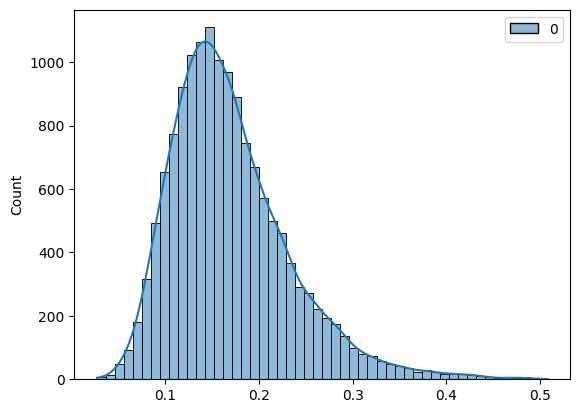

In [25]:
import seaborn as sns
sns.histplot(y_pred, bins = 50, kde=True)

In [26]:
backtest_test['model_preds'] = y_pred

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_20385/1787826085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['model_preds'] = y_pred


In [27]:
backtest_test['odds_preds'] = 1/ backtest_test['f_pm_01m']

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_20385/689424641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['odds_preds'] = 1/ backtest_test['f_pm_01m']


In [28]:
backtest_test['model_edge_basic'] = backtest_test['model_preds'] - backtest_test['odds_preds']

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_20385/4042348346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['model_edge_basic'] = backtest_test['model_preds'] - backtest_test['odds_preds']


In [29]:
backtest_test['model_edge_proportionate'] = backtest_test['model_preds'] / backtest_test['odds_preds']

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_20385/1950861892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['model_edge_proportionate'] = backtest_test['model_preds'] / backtest_test['odds_preds']


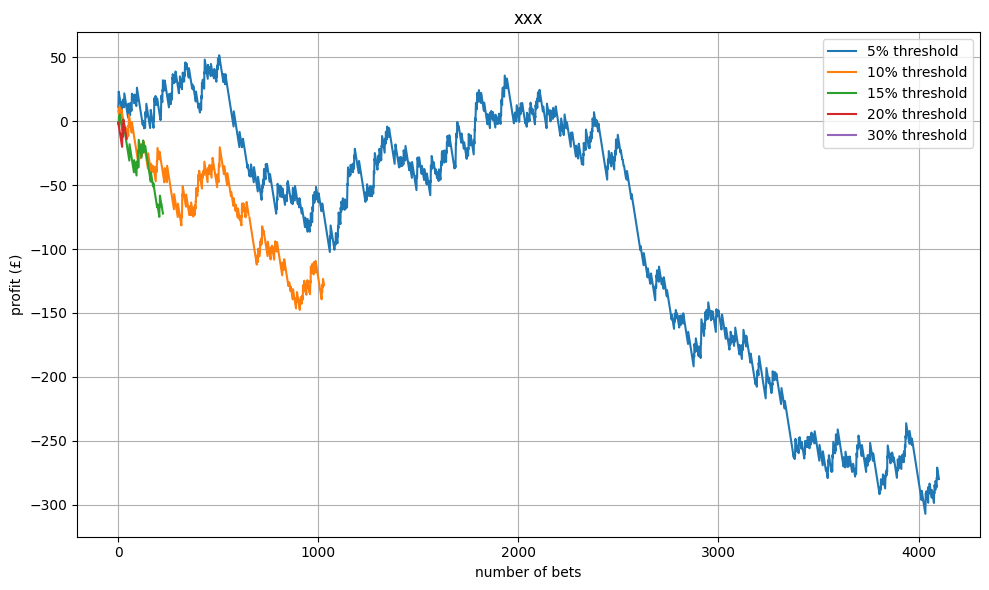

In [30]:
import matplotlib.pyplot as plt

all_bets = backtest_test
above0 = backtest_test[backtest_test['model_edge_basic'] >= 0]
above5 = backtest_test[backtest_test['model_edge_basic'] >= 0.05]
above10 = backtest_test[backtest_test['model_edge_basic'] >= 0.1]
above15 = backtest_test[backtest_test['model_edge_basic'] >= 0.15]
above20 = backtest_test[backtest_test['model_edge_basic'] >= 0.20]
above30 = backtest_test[backtest_test['model_edge_basic'] >= 0.30]

# Calculate evolutions of profits for each threshold

dfall = all_bets.sort_values(by='f_ko')
dfall['cumulative_profit'] = dfall['linear_target'].cumsum()

df0 = above0.sort_values(by='f_ko')
df0['cumulative_profit'] = df0['linear_target'].cumsum()

df5 = above5.sort_values(by='f_ko')
df5['cumulative_profit'] = df5['linear_target'].cumsum()

df10 = above10.sort_values(by='f_ko')
df10['cumulative_profit'] = df10['linear_target'].cumsum()

df15 = above15.sort_values(by='f_ko')
df15['cumulative_profit'] = df15['linear_target'].cumsum()

df20 = above20.sort_values(by='f_ko')
df20['cumulative_profit'] = df20['linear_target'].cumsum()

df30 = above30.sort_values(by='f_ko')
df30['cumulative_profit'] = df30['linear_target'].cumsum()

# Plot
plt.figure(figsize=(10,6))
#plt.plot(range(1, len(dfall) + 1), dfall['cumulative_profit'], label='all bets')
#plt.plot(range(1, len(df0) + 1), df0['cumulative_profit'], label='0% threshold')
plt.plot(range(1, len(df5) + 1), df5['cumulative_profit'], label='5% threshold')
plt.plot(range(1, len(df10) + 1), df10['cumulative_profit'], label='10% threshold')
plt.plot(range(1, len(df15) + 1), df15['cumulative_profit'], label='15% threshold')
plt.plot(range(1, len(df20) + 1), df20['cumulative_profit'], label='20% threshold')
plt.plot(range(1, len(df30) + 1), df30['cumulative_profit'], label='30% threshold')

plt.title("xxx")
plt.xlabel("number of bets")
plt.ylabel("profit (£)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()